## Logistic Regression

In [101]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [102]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [103]:
print(iris.target_names)
setosa = data[data['target'].isin([0])]
versicolor = data[data['target'].isin([1])]
virginica = data[data['target'].isin([2])]
X = data.values[:, :2]
y = data.values[:, 4]

['setosa' 'versicolor' 'virginica']


In [104]:
logreg =  LogisticRegression(C=1e5)
h = .02  # step size in the mesh
logreg.fit(X, y)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [107]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

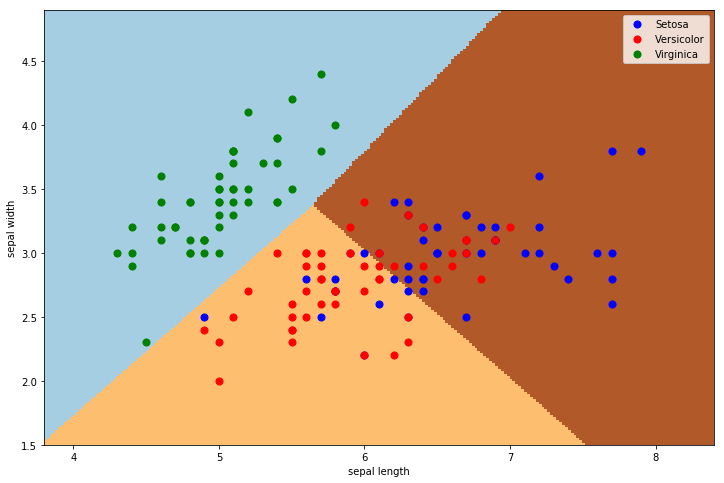

In [110]:
fig, ax = plt.subplots(figsize=(12,8))
ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
ax.scatter(virginica.values[:, 0], virginica.values[:, 1], s=50, c='b', marker='o', label='Setosa')
ax.scatter(versicolor.values[:, 0], versicolor.values[:, 1], s=50, c='r', marker='o', label='Versicolor')
ax.scatter(setosa.values[:, 0], setosa.values[:, 1], s=50, c='g', marker='o', label='Virginica')
ax.legend()
ax.set_ylabel('sepal width')
ax.set_xlabel('sepal length')